In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# configure df options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

pd.options.display.float_format = '{:,.5f}'.format

### Read samples from one station

In [3]:
station_code = 'SONDOC'  # 'BINHDAI', 'ANTHUAN', 'BENTRAI', 'LOCTHUAN', 'SONDOC'

#### Read true raw samples

In [4]:
df = pd.read_csv('../../../dataset/final/bentre-cleaned.csv', parse_dates=['date'])

In [5]:
df.set_index('date', inplace=True)

In [6]:
df = df[df['code'] == station_code]

In [7]:
# How samples distributed
df.groupby(df.index.year).count()

,code,min,max,x,y,cm
date,,,,,,
2002,181,181,181,181,181,181
2003,181,181,181,181,181,181
2004,182,182,182,182,182,182
2005,181,181,181,181,181,181
2006,181,181,181,181,181,181
2007,181,181,181,181,181,181
2008,182,182,182,182,182,182
2009,181,181,181,181,181,181
2010,181,181,181,181,181,181


From 2002 to 2010, samples are completed for dry seasons: 181 for normal years; 182 for leap years (January to June)

2011 and 2018 have samples from January to May (151 days)

2012 to 2016 have less samples, missing dates

2017 has no samples at all

#### Reread prepared test samples
Use 2011

In [8]:
test_year = 2011

In [9]:
test_df = pd.read_csv(f'../../../dataset/final/stations/{station_code}.csv', parse_dates=['date'])

In [10]:
test_df.set_index('date', inplace=True)

In [11]:
test_df = test_df[test_df.index.year == test_year]
test_df = test_df[f'{test_year}-01-01':f'{test_year}-05-31']
test_df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2011-05-22', '2011-05-23', '2011-05-24', '2011-05-25',
               '2011-05-26', '2011-05-27', '2011-05-28', '2011-05-29',
               '2011-05-30', '2011-05-31'],
              dtype='datetime64[ns]', name='date', length=151, freq=None)

In [12]:
test_df.index.freq = 'D'
test_df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2011-05-22', '2011-05-23', '2011-05-24', '2011-05-25',
               '2011-05-26', '2011-05-27', '2011-05-28', '2011-05-29',
               '2011-05-30', '2011-05-31'],
              dtype='datetime64[ns]', name='date', length=151, freq='D')

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 151 entries, 2011-01-01 to 2011-05-31
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    151 non-null    object 
 1   min     151 non-null    float64
 2   max     151 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.7+ KB


In [14]:
# sort by date index
test_df.sort_index(inplace=True)

In [15]:
test_df.head()

,code,min,max
date,,,
2011-01-01,SONDOC,0.01000,0.40000
2011-01-02,SONDOC,0.01000,0.50000
2011-01-03,SONDOC,0.10000,0.70000
2011-01-04,SONDOC,0.20000,0.80000
2011-01-05,SONDOC,0.20000,1.10000


In [16]:
test_df.tail()

,code,min,max
date,,,
2011-05-27,SONDOC,0.20000,1.60000
2011-05-28,SONDOC,0.40000,1.70000
2011-05-29,SONDOC,0.30000,1.50000
2011-05-30,SONDOC,0.30000,1.40000
2011-05-31,SONDOC,0.20000,1.50000


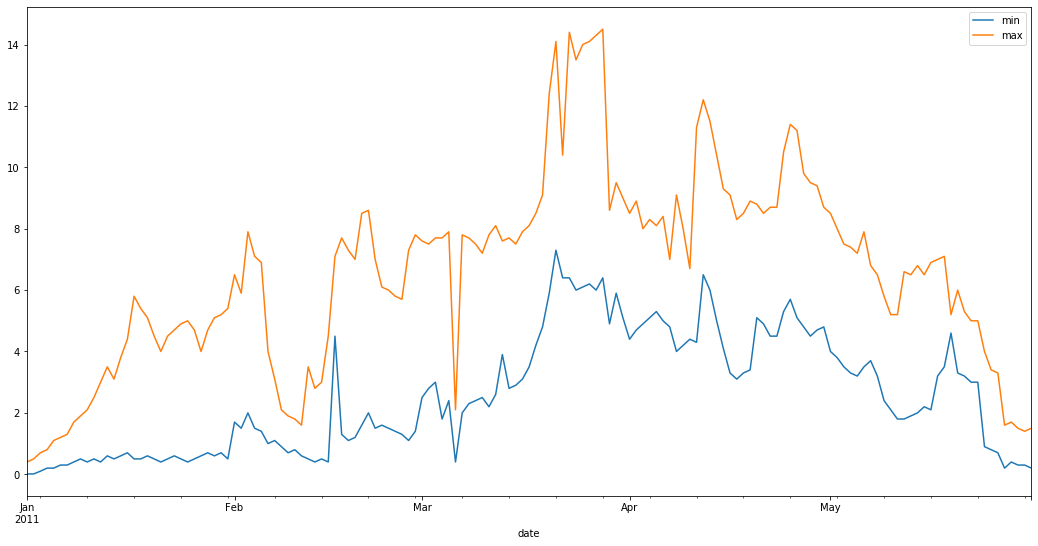

In [17]:
# plot
test_df[['min', 'max']].plot(figsize=(18, 9), legend=True);

In [18]:
# save test dataset
test_df.to_csv(f'../../data/test/{station_code}-{test_year}.csv', index=True, index_label='date')